[View in Colaboratory](https://colab.research.google.com/github/nishi1612/SC374-Computational-and-Numerical-Methods/blob/master/Set_5.ipynb)

Set 5
---



**Finding roots of polynomial by Secant method**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [89]:
def secant(prev,cur,k):
    values = []
    values.append(prev)
    values.append(cur)
    func_prev = function(prev,k)
    func_cur = function(cur,k)
    val_diff = cur - prev
    func_diff = func_cur - func_prev
    nex = cur - (func_cur * val_diff / func_diff)
    table = pd.DataFrame(columns=['x(n)' , 'f(x(n))' ,  'x(n)-x(n-1)' , 'f(x(n))-f(x(n-1))' , 'x(n+1)' , 'x(n+1)-x(n)'])
    i = 0
    table.loc[i] = [prev,func_prev,'-','-','-','-']
    i = i+1
    table.loc[i] = [cur,func_cur,val_diff,func_diff,nex,nex - cur]
    prev = cur
    cur = nex
    values.append(cur)
    while(True):
        if(abs(np.around(cur, 4) - np.around(prev,4)) == 0):
            break;
        func_prev = function(prev,k)
        func_cur = function(cur,k)
        val_diff = cur - prev
        func_diff = func_cur - func_prev
        nex = cur - (func_cur * val_diff / func_diff)
        i = i + 1
        table.loc[i] = cur,func_cur,val_diff,func_diff,nex,nex-cur
        prev = cur
        cur = nex
        values.append(cur)
    return table , nex , values

In [90]:
def newton_raphson(initial_value,epsilon,k):
    table = pd.DataFrame(columns=['x(n)','f(x(n))','f\'(x(n))','x(n+1)','x(n+1)-x(n)'])
    i = 0
    func = function(initial_value,k)
    der = derivative(initial_value,k)
    new_value = initial_value - (func/der);
    table.loc[i] = [initial_value,func,der,new_value,new_value-initial_value]
    i=i+1;
    arr = []
    arr.append(initial_value)
    while(True):
        if(abs(np.around(new_value, 5) - np.around(initial_value, 5)) == 0):
            break
        if(k==5 and (abs(new_value-initial_value) < epsilon)):
            break
        initial_value = new_value
        func = function(initial_value,k)
        der = derivative(initial_value,k)
        new_value = initial_value - (func/der);
        table.loc[i] = [initial_value,func,der,new_value,new_value-initial_value]
        arr.append(initial_value)
        i=i+1;
    func = function(initial_value,k)
    der = derivative(initial_value,k)
    table.loc[i] = [initial_value,func,der,new_value,new_value-initial_value]
    arr.append(initial_value)
    i=i+1;
    return table , arr , new_value

In [91]:
def bisection(a,b,epsilon,k):
    table = pd.DataFrame(columns=['a','b','c','b-c','f(a)*f(c)','Assign'])
    c = (a+b)/2;
    dist = b-c;
    i = 0
    arr = []
    while(dist>epsilon):
        ans_a = function(a,k);
        ans_b = function(b,k);
        ans_c = function(c,k);
        ans = ""
        if(ans_a*ans_c < 0):
            b=c;
            ans = "b=c"
        else:
            a=c;
            ans = "a=c";
        table.loc[i] = [a,b,c,dist,ans_a*ans_c,ans]
        arr.append(c)
        i = i+1
        c = (a+b) / 2
        dist = b-c 
    return (a+b)/2 ,i , arr , table;

In [92]:
def graph(different, same, arr2, arr1, i):
    plt.plot(np.arange(len(different)),different,label='On different side')
    plt.plot(np.arange(len(same)),same,label='On same side')
    plt.plot(np.arange(len(arr2)), arr2, label = 'Newton-Rhapson')
    plt.plot(np.arange(len(arr1)), arr1, label = 'Bisection')
    plt.legend(['Different side in secant method', 'Same side in secant method', 'Newton-Rhapson', 'Bisection'])
    plt.xlabel('No. of iterations')
    plt.ylabel('Value of root')
    plt.grid(True)
    plt.savefig('Iterations' + str(i) + '.png')
#   files.download('Iterations' + str(i) + '.png')
    plt.show()

In [93]:
def function(x,k):
    if k==1:
        return x**6 - x - 1;
    elif k==2:
        return x**3 - x**2 - x - 1;
    elif k==3:
        return x - 1 - 0.3*math.cos(x);
    elif k==4:
        return 0.5 + math.sin(x) - math.cos(x);
    elif k==5:
        return x - math.e**(-x);
    elif k==6:
        return math.e**(-x) - math.sin(x);
    elif k==7:
        return x**3 - 2*x - 2;
    elif k==8:
        return x**4 - x - 1;
    elif k==9:
        return math.e**(x) - x - 2;
    elif k==10:
        return (1 - x + math.sin(x));
    elif k==11:
        return x - math.tan(x);
    elif k==12:
        return x - x**2;
    elif k==13:
        return x**2 - x;

In [94]:
def derivative(x,k):
    if k==1:
        return 6*x**5 - 1;
    elif k==2:
        return 3*x**2 - 2*x - 1;
    elif k==3:
        return 1 + 0.3*math.sin(x);
    elif k==4:
        return math.cos(x) + math.sin(x);
    elif k==5:
        return 1 + math.e**(-x);
    elif k==6:
        return -1*math.e**(-x) - math.cos(x);
    elif k==7:
        return 3*x**2 - 2;
    elif k==8:
        return 4*x**3 - 1;
    elif k==9:
        return math.e**(x) - 1;
    elif k==10:
        return -1 + math.cos(x);
    elif k==11:
        return 1 - (1/math.cos(x)**2);
    elif k==12:
        return 1 - 2*x;
    elif k==13:
        return 2*x - 1;

In [95]:
table , root , different = secant(2,1,1)
print(round(root,5))
table

1.13472


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,61,-,-,-,-
1,1,-1,-1,-62,1.01613,0.016129
2,1.01613,-0.915368,0.016129,0.0846323,1.19058,0.174449
3,1.19058,0.657466,0.174449,1.57283,1.11766,-0.0729219
4,1.11766,-0.168491,-0.0729219,-0.825957,1.13253,0.0148757
5,1.13253,-0.0224373,0.0148757,0.146054,1.13482,0.00228526
6,1.13482,0.000953564,0.00228526,0.0233909,1.13472,-9.31621e-05
7,1.13472,-5.06617e-06,-9.31621e-05,-0.00095863,1.13472,4.92343e-07


1.13472


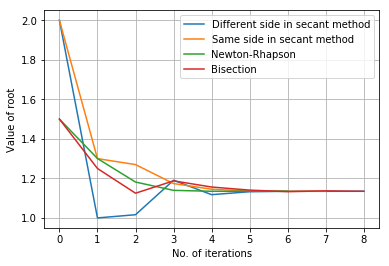

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,61,-,-,-,-
1,1.3,2.52681,-0.7,-58.4732,1.26975,-0.0302492
2,1.26975,1.92118,-0.0302492,-0.605624,1.17379,-0.0959577
3,1.17379,0.441675,-0.0959577,-1.47951,1.14515,-0.028646
4,1.14515,0.109963,-0.028646,-0.331712,1.13565,-0.00949617
5,1.13565,0.00955601,-0.00949617,-0.100407,1.13475,-0.000903779
6,1.13475,0.000236892,-0.000903779,-0.00931911,1.13472,-2.29741e-05


In [96]:
print(round(root,5))
table , arr2 , answer = newton_raphson(1.5,0.0001,1)
a, n, arr1, table = bisection(1,2,0.001,1)
table , root , same = secant(2,1.3,1)
graph(different,same,arr2,arr1,'1_1')
table

In [97]:
table , root , different = secant(-1,0,1)
print(round(root,5))
table

-0.77809


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,-1,1,-,-,-,-
1,0,-1,1,-2,-0.5,-0.5
2,-0.5,-0.484375,-0.5,0.515625,-0.969697,-0.469697
3,-0.969697,0.801109,-0.469697,1.28548,-0.676984,0.292713
4,-0.676984,-0.226751,0.292713,-1.02786,-0.741558,-0.0645741
5,-0.741558,-0.092151,-0.0645741,0.1346,-0.785767,-0.0442092
6,-0.785767,0.0211428,-0.0442092,0.113294,-0.777517,0.00825029
7,-0.777517,-0.00155185,0.00825029,-0.0226947,-0.778081,-0.000564151
8,-0.778081,-2.41324e-05,-0.000564151,0.00152772,-0.77809,-8.91153e-06


-0.77809


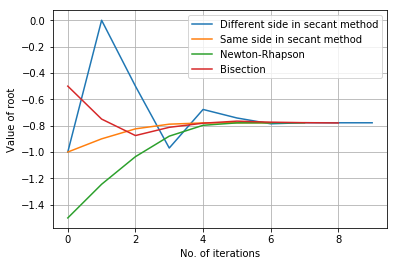

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,-1,1,-,-,-,-
1,-0.9,0.431441,0.1,-0.568559,-0.824117,0.0758832
2,-0.824117,0.137397,0.0758832,-0.294044,-0.788659,0.0354576
3,-0.788659,0.0292817,0.0354576,-0.108115,-0.779056,0.00960327
4,-0.779056,0.00262502,0.00960327,-0.0266566,-0.77811,0.000945686
5,-0.77811,5.5946e-05,0.000945686,-0.00256908,-0.77809,2.05939e-05


In [98]:
print(round(root,5))
table, arr2, answer = newton_raphson(-1.5,0.0001,1)
a, n, arr1, table = bisection(-1,0,0.001,1)
table , root , same = secant(-1,-0.9,1)
graph(different,same,arr2,arr1,'1_2')
table

In [99]:
table , root , different = secant(2,1,2)
print(round(root,5))
table

1.83929


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,1,-,-,-,-
1,1,-2,-1,-3,1.66667,0.666667
2,1.66667,-0.814815,0.666667,1.18519,2.125,0.458333
3,2.125,1.95508,0.458333,2.76989,1.80149,-0.323506
4,1.80149,-0.200342,-0.323506,-2.15542,1.83156,0.0300692
5,1.83156,-0.0419823,0.0300692,0.158359,1.83953,0.00797159
6,1.83953,0.00135629,0.00797159,0.0433386,1.83929,-0.000249473
7,1.83929,-8.68907e-06,-0.000249473,-0.00136498,1.83929,1.58807e-06


1.83929


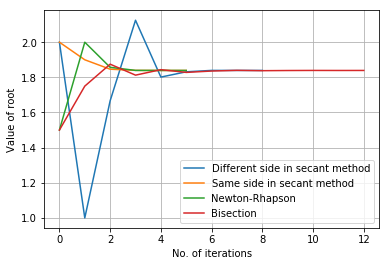

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,1,-,-,-,-
1,1.9,0.349,-0.1,-0.651,1.84639,-0.0536098
2,1.84639,0.0390865,-0.0536098,-0.309913,1.83963,-0.00676131
3,1.83963,0.00187196,-0.00676131,-0.0372146,1.83929,-0.000340106
4,1.83929,1.09297e-05,-0.000340106,-0.00186103,1.83929,-1.99742e-06


In [100]:
print(round(root,5))
table1 , arr2 , answer = newton_raphson(1.5,0.0001,2)
a, n, arr1, table = bisection(1,2,0.0001,2)
table , root , same = secant(2,1.9,2)
graph(different,same,arr2, arr1, '2_1')
table

In [101]:
table1 , arr2 , answer = newton_raphson(1,0.0001,3)
a, n, arr1, table = bisection(0,2,0.0001,3)
table , root , different = secant(1,2,3)
print(round(root,5))
table

1.12843


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,-0.162091,-,-,-,-
1,2,1.124844,1,1.28693,1.12595,-0.874049
2,1.12595,-0.003145,-0.874049,-1.12799,1.12839,0.0024366
3,1.12839,-0.000048,0.0024366,0.00309682,1.12843,3.75224e-05


1.12843


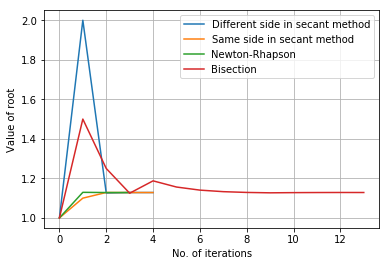

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,-1.620907e-01,-,-,-,-
1,1.1,-3.607884e-02,0.1,0.126012,1.12863,0.0286313
2,1.12863,2.621211e-04,0.0286313,0.036341,1.12842,-0.000206513
3,1.12842,-3.843924e-07,-0.000206513,-0.000262505,1.12843,3.02401e-07


In [102]:
table , root , same = secant(1,1.1,3)
print(round(root,5))
graph(different,same,arr2, arr1, '3_1')
table

In [103]:
table1 , arr2 , answer = newton_raphson(1,0.0001,4)
a, n, arr1, table = bisection(0,2,0.0001,4)
table , root , different = secant(1,0,4)
print(round(root,5))
table

0.42403


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,0.801169,-,-,-,-
1,0,-0.500000,-1,-1.30117,0.38427,0.38427
2,0.38427,-0.052190,0.38427,0.44781,0.429055,0.0447847
3,0.429055,0.006652,0.0447847,0.0588418,0.423992,-0.00506274
4,0.423992,-0.000052,-0.00506274,-0.00670366,0.424031,3.91291e-05


0.42403


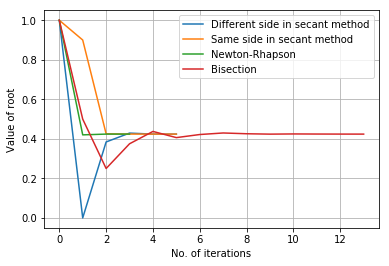

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,8.011687e-01,-,-,-,-
1,0.9,6.617169e-01,-0.1,-0.139452,0.425487,-0.474513
2,0.425487,1.926282e-03,-0.474513,-0.659791,0.424101,-0.00138536
3,0.424101,9.309773e-05,-0.00138536,-0.00183318,0.424031,-7.0355e-05
4,0.424031,2.556971e-08,-7.0355e-05,-9.30722e-05,0.424031,-1.93286e-08


In [104]:
table , root , same = secant(1,0.9,4)
print(round(root,5))
graph(different,same,arr2, arr1,'4_1')
table

In [105]:
table1 , arr2 , answer = newton_raphson(0,0.0001,5)
a, n, arr1, table = bisection(0,1,0.0001,5)
table , root , different = secant(0,1,5)
print(round(root,5))
table

0.56714


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,0,-1.000000e+00,-,-,-,-
1,1,6.321206e-01,1,1.63212,0.6127,-0.3873
2,0.6127,7.081395e-02,-0.3873,-0.561307,0.563838,-0.0488614
3,0.563838,-5.182355e-03,-0.0488614,-0.0759963,0.56717,0.00333197
4,0.56717,4.241924e-05,0.00333197,0.00522477,0.567143,-2.70518e-05
5,0.567143,2.538017e-08,-2.70518e-05,-4.23939e-05,0.567143,-1.61953e-08


0.56714


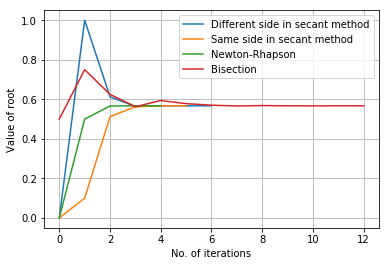

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,0,-1.000000,-,-,-,-
1,0.1,-0.804837,0.1,0.195163,0.512393,0.412393
2,0.512393,-0.086667,0.412393,0.718171,0.56216,0.0497665
3,0.56216,-0.007817,0.0497665,0.0788499,0.567093,0.00493369
4,0.567093,-0.000078,0.00493369,0.00773886,0.567143,4.97745e-05


In [106]:
table , root , same = secant(0,0.1,5)
print(round(root,5))
graph(different,same,arr2, arr1, '5_1')
table

In [107]:
table1 , arr2 , answer = newton_raphson(0.5,0.0001,6)
a, n, arr1, table = bisection(0,1,0.0001,6)
table , root , different = secant(1,0.5,6)
print(round(root,5))
table

0.58853


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,-0.473592,-,-,-,-
1,0.5,0.127105,-0.5,0.600697,0.605798,0.105798
2,0.605798,-0.023780,0.105798,-0.150885,0.589124,-0.0166739
3,0.589124,-0.000820,-0.0166739,0.0229594,0.588529,-0.000595607
4,0.588529,0.000006,-0.000595607,0.000825851,0.588533,4.12424e-06


0.58853


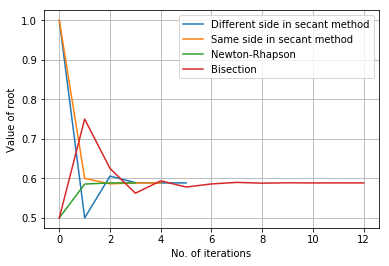

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,-0.473592,-,-,-,-
1,0.6,-0.015831,-0.4,0.457761,0.586167,-0.0138333
2,0.586167,0.003285,-0.0138333,0.0191154,0.588544,0.00237694
3,0.588544,-0.000015,0.00237694,-0.00329968,0.588533,-1.08979e-05


In [108]:
table , root , same = secant(1,0.6,6)
print(round(root,5))
graph(different,same,arr2,arr1,'6_1')
table

In [109]:
table1 , arr2 , answer = newton_raphson(4,0.0001,6)
a, n, arr1, table = bisection(3,4,0.0001,6)
table , root , different = secant(2.5,4,6)
print(round(root,5))
table

3.09636


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2.500000,-5.163871e-01,-,-,-,-
1,4.000000,7.751181e-01,1.5,1.29151,3.09975,-0.90025
2,3.099750,3.230336e-03,-0.90025,-0.771888,3.09598,-0.00376753
3,3.095983,-3.635020e-04,-0.00376753,-0.00359384,3.09636,0.00038107
4,3.096364,-5.767185e-08,0.00038107,0.000363444,3.09636,6.04687e-08


3.09636


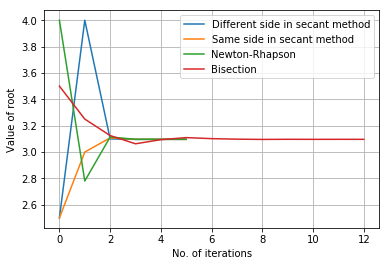

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2.500000,-5.163871e-01,-,-,-,-
1,3.000000,-9.133294e-02,0.5,0.425054,3.10744,0.107437
2,3.107437,1.056622e-02,0.107437,0.101899,3.0963,-0.0111404
3,3.096296,-6.443359e-05,-0.0111404,-0.0106307,3.09636,6.75234e-05
4,3.096364,-3.237314e-08,6.75234e-05,6.44012e-05,3.09636,3.39426e-08


In [110]:
table , root , same = secant(2.5,3,6)
print(round(root,5))
graph(different,same,arr2,arr1,'6_2')
table

In [111]:
table1 , arr2 , answer = newton_raphson(1.5,0.0001,7)
a, n, arr1, table = bisection(1,2,0.0001,7)
table , root , different = secant(2,1,7)
print(round(root,5))
table

1.76929


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,2,-,-,-,-
1,1,-3,-1,-5,1.6,0.6
2,1.6,-1.104,0.6,1.896,1.94937,0.349367
3,1.94937,1.50892,0.349367,2.61292,1.74761,-0.201754
4,1.74761,-0.157752,-0.201754,-1.66668,1.76671,0.0190962
5,1.76671,-0.0190577,0.0190962,0.138694,1.76933,0.00262397
6,1.76933,0.000301132,0.00262397,0.0193589,1.76929,-4.08165e-05


1.76929


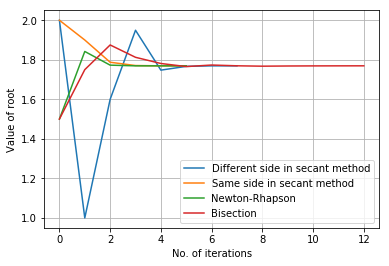

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,2,-,-,-,-
1,1.9,1.059,-0.1,-0.941,1.78746,-0.11254
2,1.78746,0.13604,-0.11254,-0.92296,1.77087,-0.0165878
3,1.77087,0.0116914,-0.0165878,-0.124348,1.76931,-0.00155961
4,1.76931,0.000150788,-0.00155961,-0.0115406,1.76929,-2.03776e-05


In [113]:
table , root , same = secant(2,1.9,7)
print(round(root,5))
graph(different,same,arr2,arr1,'7_1')
table

In [114]:
table1 , arr2 , answer = newton_raphson(1,0.0001,8)
a, n, arr1, table = bisection(1,2,0.0001,8)
table , root , different = secant(2,1,8)
print(round(root,5))
table

1.22074


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,13,-,-,-,-
1,1,-1,-1,-14,1.07143,0.0714286
2,1.07143,-0.753618,0.0714286,0.246382,1.28991,0.218482
3,1.28991,0.478548,0.218482,1.23217,1.20506,-0.0848537
4,1.20506,-0.0962846,-0.0848537,-0.574832,1.21927,0.014213
5,1.21927,-0.00923606,0.014213,0.0870485,1.22078,0.00150804
6,1.22078,0.000210003,0.00150804,0.00944606,1.22074,-3.35264e-05
7,1.22074,-4.41665e-07,-3.35264e-05,-0.000210445,1.22074,7.03626e-08


1.22074


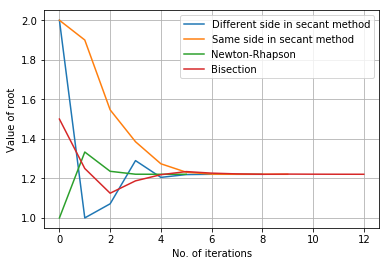

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,13,-,-,-,-
1,1.9,10.1321,-0.1,-2.8679,1.54671,-0.353293
2,1.54671,3.1764,-0.353293,-6.9557,1.38537,-0.161335
3,1.38537,1.29816,-0.161335,-1.87824,1.27386,-0.111509
4,1.27386,0.359377,-0.111509,-0.938786,1.23118,-0.0426867
5,1.23118,0.0664562,-0.0426867,-0.292921,1.22149,-0.00968451
6,1.22149,0.00469596,-0.00968451,-0.0617602,1.22076,-0.000736364
7,1.22076,6.90318e-05,-0.000736364,-0.00462693,1.22074,-1.09862e-05
8,1.22074,7.34436e-08,-1.09862e-05,-6.89583e-05,1.22074,-1.17008e-08


In [115]:
table , root , same = secant(2,1.9,8)
print(round(root,5))
graph(different,same,arr2,arr1,'8_1')
table

In [116]:
table1 , arr2 , answer = newton_raphson(-0.5,0.0001,8)
a, n, arr1, table = bisection(-1,0,0.0001,8)
table , root , different = secant(-1,0,8)
print(round(root,5))
table

-0.72449


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,-1,1,-,-,-,-
1,0,-1,1,-2,-0.5,-0.5
2,-0.5,-0.4375,-0.5,0.5625,-0.888889,-0.388889
3,-0.888889,0.513184,-0.388889,0.950684,-0.678965,0.209924
4,-0.678965,-0.108521,0.209924,-0.621705,-0.715608,-0.036643
5,-0.715608,-0.0221517,-0.036643,0.086369,-0.725006,-0.00939808
6,-0.725006,0.00129622,-0.00939808,0.0234479,-0.724486,0.000519533
7,-0.724486,-1.44153e-05,0.000519533,-0.00131063,-0.724492,-5.71421e-06


-0.72449


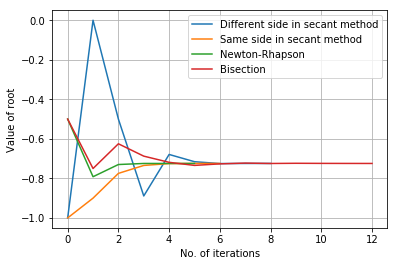

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,-1,1,-,-,-,-
1,-0.9,0.5561,0.1,-0.4439,-0.774724,0.125276
2,-0.774724,0.134961,0.125276,-0.421139,-0.734577,0.0401467
3,-0.734577,0.0257496,0.0401467,-0.109211,-0.725112,0.00946572
4,-0.725112,0.0015634,0.00946572,-0.0241862,-0.7245,0.000611865
5,-0.7245,1.96113e-05,0.000611865,-0.00154379,-0.724492,7.77272e-06


In [117]:
table , root , same = secant(-1,-0.9,8)
print(round(root,5))
graph(different,same,arr2,arr1,'8_2')
table

In [118]:
table1 , arr2 , answer = newton_raphson(1.5,0.0001,9)
a, n, arr1, table = bisection(1,2,0.0001,9)
table , root , different = secant(2,1,9)
print(round(root,5))
table

1.14619


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,3.389056,-,-,-,-
1,1,-0.281718,-1,-3.67077,1.07675,0.0767463
2,1.07675,-0.141632,0.0767463,0.140086,1.15434,0.0775935
3,1.15434,0.017589,0.0775935,0.159221,1.14577,-0.00857159
4,1.14577,-0.000912,-0.00857159,-0.0185007,1.14619,0.000422481
5,1.14619,-0.000005,0.000422481,0.000906442,1.14619,2.5308e-06


1.14619


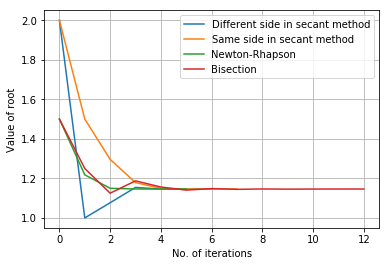

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,3.389056e+00,-,-,-,-
1,1.5,9.816891e-01,-0.5,-2.40737,1.29611,-0.203893
2,1.29611,3.589337e-01,-0.203893,-0.622755,1.17859,-0.117516
3,1.17859,7.120087e-02,-0.117516,-0.287733,1.14951,-0.02908
4,1.14951,7.137805e-03,-0.02908,-0.0640631,1.14627,-0.00324005
5,1.14627,1.667138e-04,-0.00324005,-0.00697109,1.14619,-7.74858e-05
6,1.14619,4.048408e-07,-7.74858e-05,-0.000166309,1.14619,-1.88621e-07


In [119]:
table , root , same = secant(2,1.5,9)
print(round(root,5))
graph(different,same,arr2,arr1,'9_1')
table

In [120]:
table1 , arr2 , answer = newton_raphson(1,0.0001,10)
a, n, arr1, table = bisection(0,2,0.0001,10)
table , root , different = secant(2.5,1,10)
print(round(root,5))
table

1.93456


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2.500000,-0.901528,-,-,-,-
1,1.000000,0.841471,-1.5,1.743,1.72416,0.724158
2,1.724158,0.264105,0.724158,-0.577366,2.05541,0.331253
3,2.055410,-0.170556,0.331253,-0.434661,1.92543,-0.129979
4,1.925431,0.012342,-0.129979,0.182898,1.9342,0.00877136
5,1.934202,0.000489,0.00877136,-0.0118532,1.93456,0.000362021
6,1.934564,-0.000002,0.000362021,-0.000490766,1.93456,-1.1411e-06


1.93456


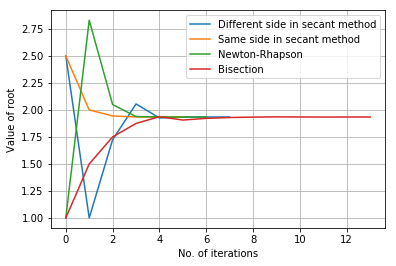

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2.500000,-9.015279e-01,-,-,-,-
1,2.000000,-9.070257e-02,-0.5,0.810825,1.94407,-0.0559323
2,1.944068,-1.292838e-02,-0.0559323,0.0777742,1.93477,-0.0092976
3,1.934770,-2.805772e-04,-0.0092976,0.0126478,1.93456,-0.000206257
4,1.934564,-9.148460e-07,-0.000206257,0.000279662,1.93456,-6.74718e-07


In [121]:
table , root , same = secant(2.5,2,10)
print(round(root,5))
graph(different,same,arr2,arr1,'10_1')
table

In [122]:
table1 , arr2 , answer = newton_raphson(4.5,0.0001,11)
a, n, arr1, table = bisection(4,5,0.0001,11)
table , root , different = secant(4.6,4.2,11)
print(round(root,5))
table

4.49341


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,4.600000,-4.260175,-,-,-,-
1,4.200000,2.422220,-0.4,6.6824,4.34499,0.144991
2,4.344991,1.746728,0.144991,-0.675492,4.71992,0.374927
3,4.719918,137.533633,0.374927,135.787,4.34017,-0.37975
4,4.340168,1.778826,-0.37975,-135.755,4.33519,-0.00497595
5,4.335192,1.810997,-0.00497595,0.0321715,4.6153,0.280106
6,4.615299,-5.652005,0.280106,-7.463,4.40316,-0.212135
7,4.403164,1.273013,-0.212135,6.92502,4.44216,0.0389963
8,4.442160,0.832111,0.0389963,-0.440902,4.51576,0.0735975
9,4.515758,-0.504188,0.0735975,-1.3363,4.48799,-0.0277685


4.49341


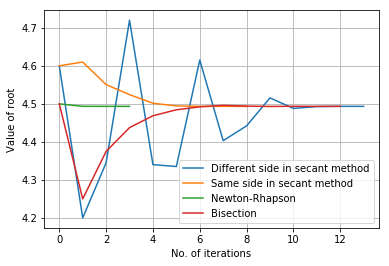

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,4.600000,-4.260175,-,-,-,-
1,4.610000,-5.122522,0.01,-0.862348,4.5506,-0.0594021
2,4.550598,-1.576189,-0.0594021,3.54633,4.5242,-0.0264016
3,4.524196,-0.726628,-0.0264016,0.849561,4.50162,-0.0225812
4,4.501615,-0.172339,-0.0225812,0.554289,4.49459,-0.00702092
5,4.494594,-0.024055,-0.00702092,0.148284,4.49346,-0.00113893
6,4.493455,-0.000925,-0.00113893,0.02313,4.49341,-4.55261e-05
7,4.493410,-0.000005,-4.55261e-05,0.000919405,4.49341,-2.55684e-07


In [123]:
table , root , same = secant(4.6,4.61,11)
print(round(root,5))
graph(different,same,arr2,arr1,'11_1')
table